From https://towardsdatascience.com/quickly-test-multiple-models-a98477476f0

In [7]:
from math import ceil
from typing import Tuple

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import loguniform
from sklearn.datasets import load_breast_cancer, load_boston
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, mean_absolute_error, mean_absolute_percentage_error, \
    mean_squared_error
from sklearn.model_selection import train_test_split, KFold, cross_validate, RandomizedSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.svm import SVC, SVR
from xgboost import XGBClassifier, XGBRegressor

from src.sklearn.utils import get_best_model, cv_regression

X, y = data = load_breast_cancer(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=8675309)

def run_clf_exps(X_train: pd.DataFrame , y_train: pd.DataFrame, X_test: pd.DataFrame, y_test: pd.DataFrame) -> Tuple[dict, pd.DataFrame]:
    '''
    Lightweight script to test many models and find winners:param X_train: training split
    :param y_train: training target vector
    :param X_test: test split
    :param y_test: test target vector
    :return: DataFrame of predictions
    '''

    dfs = []
    models = [
          ('LogReg', LogisticRegression()),
          ('RF', RandomForestClassifier()),
          ('KNN', KNeighborsClassifier()),
          ('SVM', SVC()),
          ('GNB', GaussianNB()),
          ('XGB', XGBClassifier())
        ]
    results = []
    scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted', 'roc_auc']
    target_names = ['malignant', 'benign']
    classification_reports = dict()
    for name, model in models:
        kfold = KFold(n_splits=5, shuffle=True, random_state=666)
        cv_results = cross_validate(model, X_train, y_train, cv=kfold, scoring=scoring)
        clf = model.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        classification_reports[name] = classification_report(y_test, y_pred, target_names=target_names)
        results.append(cv_results)
        this_df = pd.DataFrame(cv_results)
        this_df['model'] = name
        dfs.append(this_df)
    return classification_reports, pd.concat(dfs, ignore_index=True)

In [2]:
classification_reports, cv_results = run_clf_exps(X_train, y_train, X_test, y_test)

/home/rozierale/.miniconda3/envs/fastML/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/rozierale/.miniconda3/envs/fastML/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modul

[19:15:54] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:15:54] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/rozierale/.miniconda3/envs/fastML/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/rozierale/.miniconda3/envs/fastML/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/rozierale/.miniconda3/envs/fastML/lib/

[19:15:54] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:15:54] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:15:54] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:15:55] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: 

/home/rozierale/.miniconda3/envs/fastML/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [3]:
for model, report in classification_reports.items():
    print(f'{model}:\n{report}')

LogReg:
              precision    recall  f1-score   support

   malignant       0.88      0.93      0.90        45
      benign       0.97      0.94      0.95        98

    accuracy                           0.94       143
   macro avg       0.92      0.94      0.93       143
weighted avg       0.94      0.94      0.94       143

RF:
              precision    recall  f1-score   support

   malignant       0.90      0.98      0.94        45
      benign       0.99      0.95      0.97        98

    accuracy                           0.96       143
   macro avg       0.94      0.96      0.95       143
weighted avg       0.96      0.96      0.96       143

KNN:
              precision    recall  f1-score   support

   malignant       0.87      0.87      0.87        45
      benign       0.94      0.94      0.94        98

    accuracy                           0.92       143
   macro avg       0.90      0.90      0.90       143
weighted avg       0.92      0.92      0.92       143

SV

In [10]:
bootstrap_df = cv_results.groupby('model').sample(n=30,replace=True)

,fit_time,score_time,test_accuracy,test_precision_weighted,test_recall_weighted,test_f1_weighted,test_roc_auc,model
0,0.058885,0.002964,0.976744,0.978198,0.976744,0.976908,0.996429,LogReg
1,0.016399,0.002709,0.870588,0.869998,0.870588,0.870166,0.966392,LogReg
2,0.016399,0.002709,0.870588,0.869998,0.870588,0.870166,0.966392,LogReg
3,0.016774,0.002652,0.988235,0.988615,0.988235,0.988278,0.998788,LogReg
4,0.016645,0.002597,0.929412,0.932381,0.929412,0.928720,0.994898,LogReg
...,...,...,...,...,...,...,...,...
175,0.235434,0.008520,0.929412,0.932381,0.929412,0.928720,0.981293,XGB
176,0.081478,0.004974,0.965116,0.965655,0.965116,0.965245,0.997024,XGB
177,0.068765,0.004920,0.941176,0.941794,0.941176,0.941349,0.985849,XGB
178,0.146205,0.014778,0.988235,0.988445,0.988235,0.988189,0.999394,XGB


In [12]:
results_long = pd.melt(bootstrap_df,id_vars=['model'],var_name='metrics', value_name='values')
time_metrics = ['fit_time','score_time'] # fit time metrics
# ## PERFORMANCE METRICS
results_long_nofit = results_long.loc[~results_long['metrics'].isin(time_metrics)] # get df without fit data
results_long_nofit = results_long_nofit.sort_values(by='values')
## TIME METRICS
results_long_fit = results_long.loc[results_long['metrics'].isin(time_metrics)] # df with fit data
results_long_fit = results_long_fit.sort_values(by='values')


Text(0.5, 1.0, 'Comparison of Model by Fit and Score Time')

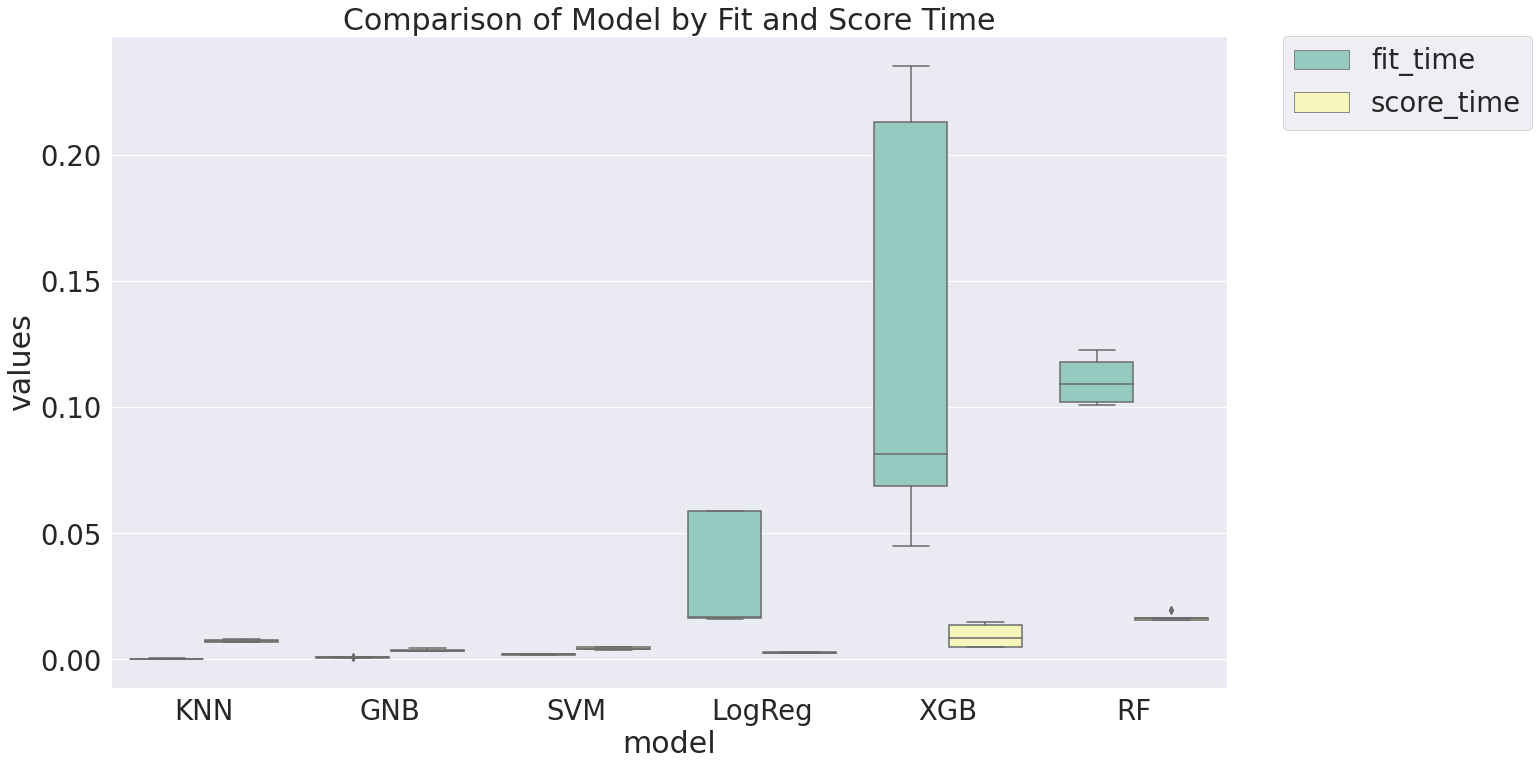

In [13]:
plt.figure(figsize=(20, 12))
sns.set(font_scale=2.5)
g = sns.boxplot(x="model", y="values", hue="metrics", data=results_long_fit, palette="Set3")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Comparison of Model by Fit and Score Time')

In [ ]:
metrics = results_long_nofit.metrics.unique()
bootstrap_df.groupby(['model'])[metrics].agg([np.std, np.mean])



## Regression

### Run CV

In [1]:
X, y = load_boston(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=8675309)

NameError: name 'load_boston' is not defined

In [28]:
best_models, cv_results = cv_regression(X_train,y_train)

NameError: name 'cv_regression' is not defined

In [29]:
entry = get_best_model(best_models, cv_results)



TypeError: get_best_model() takes 1 positional argument but 2 were given

In [4]:
a = pd.DataFrame(dict(a=[1,2,3],b=[4,5,6]))